Name1 : Thulana - C861333
    
Name2 : Praveen - C860583

In [76]:
import pandas as pd
import numpy as np

import scipy
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import scipy.cluster.hierarchy as sch

from pylab import rcParams
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler

In [48]:
df = pd.read_csv('train.csv')

In [49]:
np.set_printoptions(precision=4,suppress=True)

In [50]:
plt.figure(figsize=(10,3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [51]:
df.shape

(1460, 81)

In [52]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [53]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [59]:
df = df[['LotArea','SalePrice']]

scaler = MinMaxScaler()
scaler.fit(df[['SalePrice']])
df['SalePrice'] = scaler.transform(df[['SalePrice']])

scaler.fit(df[['LotArea']])
df['LotArea'] = scaler.transform(df[['LotArea']])

In [60]:
df

,LotArea,SalePrice
0,0.033420,0.241078
1,0.038795,0.203583
2,0.046507,0.261908
3,0.038561,0.145952
4,0.060576,0.298709
...,...,...
1455,0.030929,0.194556
1456,0.055505,0.243161
1457,0.036187,0.321622
1458,0.039342,0.148903


In [61]:
Z=linkage(df,method="ward")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


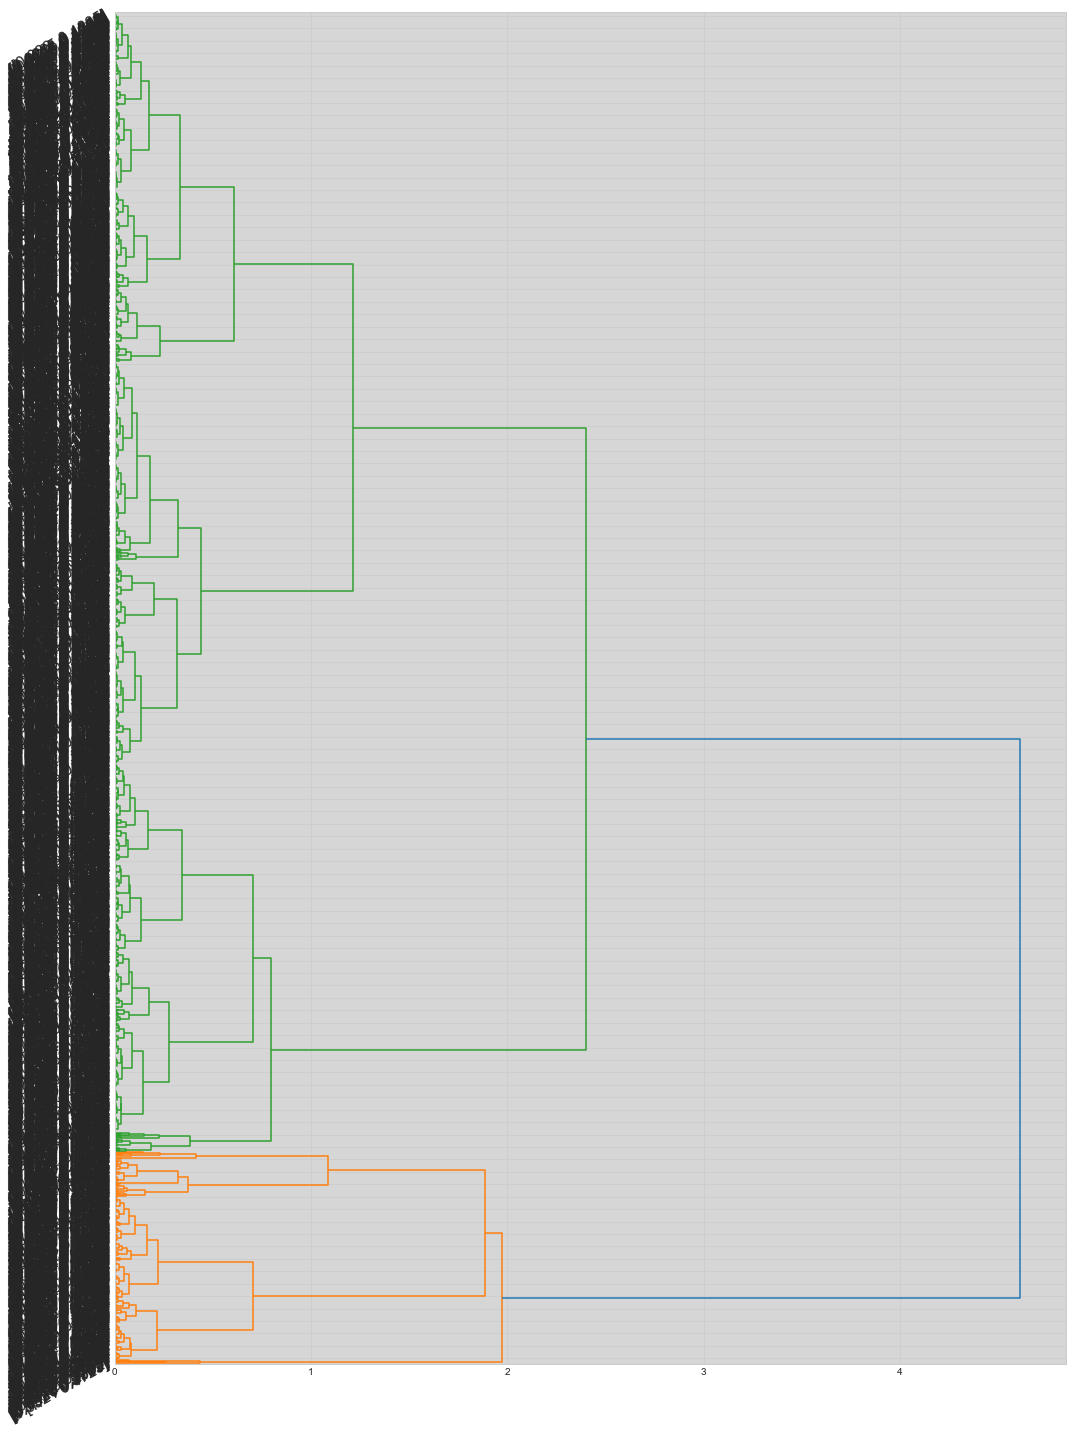

In [64]:
fig, ax = plt.subplots(figsize=(15, 20))
ax=dendrogram(Z,orientation="right",labels=np.array(df),leaf_rotation=30,leaf_font_size=16)
plt.tight_layout()
plt.show()

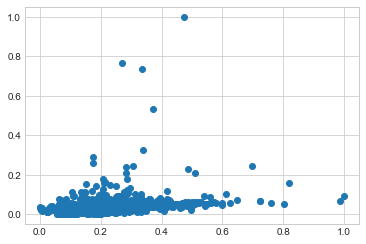

In [65]:
plt.scatter(x=df['SalePrice'],y=df['LotArea'])

In [73]:
hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [74]:
df['y_hc'] = hc.fit_predict(df)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without 

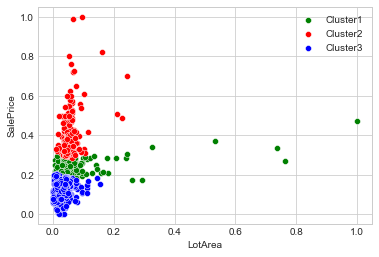

In [78]:
df1 = df[df.y_hc==0]
df2 = df[df.y_hc==1]
df3 = df[df.y_hc==2]

sns.scatterplot(df1['LotArea'],df1['SalePrice'],color='green',label = 'Cluster1')
sns.scatterplot(df2['LotArea'],df2['SalePrice'],color='red',label = 'Cluster2')
sns.scatterplot(df3['LotArea'],df3['SalePrice'],color='blue',label = 'Cluster3')

# plt.scatter(df1['LotArea'],df1['SalePrice'],color='green')
# plt.scatter(df2['LotArea'],df2['SalePrice'],color='red')
# plt.scatter(df3['LotArea'],df3['SalePrice'],color='blue')

plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.legend()

In [79]:
from pandas_profiling import ProfileReport
#Creating pandas profile
profile = ProfileReport(df, title="Pandas Profiling Report 04-Nov")

In [80]:
profile.to_file("Pandas_Profiling_report_04_Nov.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]